<a href="https://colab.research.google.com/github/devtruerimco/Heart-disease-prediction/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df= pd.read_csv("/content/drive/MyDrive/heart.csv")

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.shape

(1025, 14)

In [10]:
df["thal"].unique()

array([3, 2, 1, 0])

In [11]:
df["slope"].unique()

array([2, 0, 1])

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


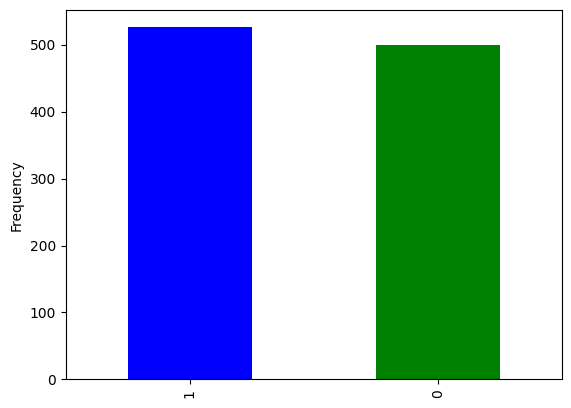

In [14]:
pd.value_counts(df["target"]).plot(kind='bar',color=['blue','green'])
plt.ylabel("Frequency")
plt.show()

Creating dummy variable


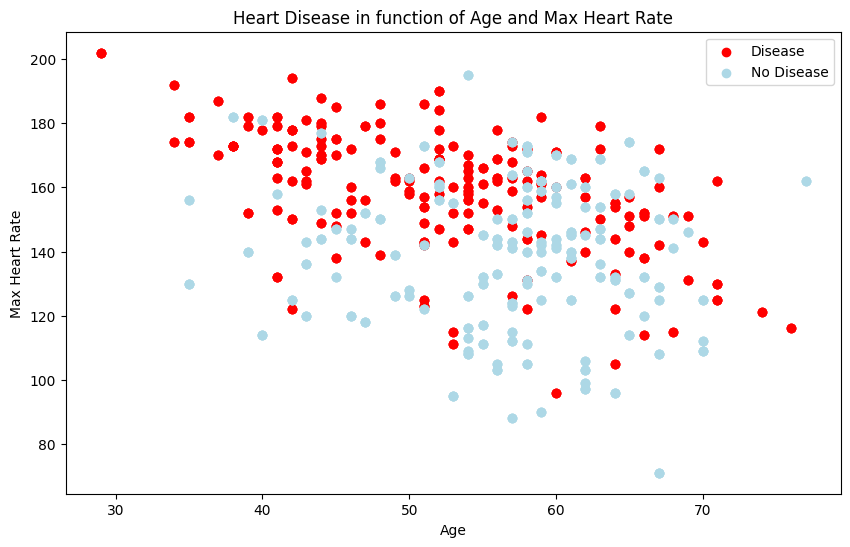

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="red")


plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

In [16]:
df_copy= df.copy()

In [17]:
df_copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Check for class imbalance
## correlation analysis: for feature selection
https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
## We dont need to encode the categorical values they are already int32

In [18]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# PRACTISE

In [19]:


np.random.seed(42)

y= df_copy["target"]
X= df_copy.drop(["target"], axis=1)


X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.25 )

scaler= MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)






In [20]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((768, 13), (257, 13), (768,), (257,))

In [22]:
#Logistic Regression baseline model


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg_model=LogisticRegression(random_state=42)

log_reg_model.fit(X_train,y_train)

y_pred= log_reg_model.predict(X_test)


print("Classification report for Logistic Regression:\n",classification_report(y_test,y_pred))
#print("accuracy:", accuracy())

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       132
           1       0.74      0.90      0.82       125

    accuracy                           0.80       257
   macro avg       0.81      0.80      0.80       257
weighted avg       0.82      0.80      0.80       257



In [23]:
log_reg_model.coef_

array([[-0.59587622, -1.60970418,  2.13045918, -1.1385592 , -1.87339071,
        -0.09626661,  0.33366036,  2.22371901, -0.88457885, -2.8706466 ,
         1.23470088, -2.51674526, -2.40533603]])

In [24]:
# def classification_report_csv(report):
#     report_data = []
#     lines = report.split('\n')
#     for line in lines[2:-3]:
#         row = {}
#         row_data = line.split('      ')
#         row['class'] = row_data[0]
#         row['precision'] = float(row_data[1])
#         row['recall'] = float(row_data[2])
#         row['f1_score'] = float(row_data[3])
#         row['support'] = float(row_data[4])
#         report_data.append(row)
#     dataframe = pd.DataFrame.from_dict(report_data)
#     dataframe.to_csv('classification_report.csv', index = False)

# report = classification_report(y_test, y_pred)


# print(report.split('\n'))
# lines= report.split('\n')
# report_data={}
# for line in lines[2:-3]:
#         row = {}
#         row_data = line.split('      ')
#         row['class'] = row_data[0]
#         row['precision'] = float(row_data[1])
#         row['recall'] = float(row_data[2])
#         row['f1_score'] = float(row_data[3])
#         row['support'] = float(row_data[4])
#         report_data.append(row)

# print(report_data)
# #classification_report_csv(report)

In [25]:
print("confusion matrix:\n", confusion_matrix(y_test,y_pred))

confusion matrix:
 [[ 93  39]
 [ 12 113]]


In [26]:
column_list=['age',	'sex',	'cp',	'trestbps','chol',	'fbs',	'restecg', 'thalach',	'exang', 'oldpeak',	'slope',	'ca',	'thal']

test_df= pd.DataFrame(columns=column_list)


## LOGISTIC REGRESSION with l2 penalty

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg_model_l1=LogisticRegression(random_state=42,penalty='l2')

log_reg_model_l1.fit(X_train,y_train)

y_pred= log_reg_model_l1.predict(X_test)

print("accuyracy")
print("Classification report for logistic regression with l2(Ridge) penalty:\n",classification_report(y_test,y_pred))


accuyracy
Classification report for logistic regression with l2(Ridge) penalty:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       132
           1       0.74      0.90      0.82       125

    accuracy                           0.80       257
   macro avg       0.81      0.80      0.80       257
weighted avg       0.82      0.80      0.80       257



In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg_model_l1=LogisticRegression(random_state=42,penalty='l1', solver='liblinear')

log_reg_model_l1.fit(X_train,y_train)

y_pred= log_reg_model_l1.predict(X_test)


print("Classification report for logistic regression with l1(Lasso) penalty:\n",classification_report(y_test,y_pred))

Classification report for logistic regression with l1(Lasso) penalty:
               precision    recall  f1-score   support

           0       0.91      0.69      0.78       132
           1       0.74      0.93      0.82       125

    accuracy                           0.81       257
   macro avg       0.82      0.81      0.80       257
weighted avg       0.83      0.81      0.80       257



## DECISION TREES

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)

print("classification report for decision tree:\n", classification_report(y_test, y_pred))


classification report for decision tree:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       132
           1       0.88      0.90      0.89       125

    accuracy                           0.89       257
   macro avg       0.89      0.90      0.89       257
weighted avg       0.90      0.89      0.89       257



## RANDOM FOREST



In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_clf= RandomForestClassifier(random_state= 42)

rf_clf.fit(X_train, y_train)
y_pred= rf_clf.predict(X_test)

print("classification report for randomforest classifier:\n", classification_report(y_test, y_pred))


classification report for randomforest classifier:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       132
           1       0.98      0.98      0.98       125

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257

